In [70]:
! git clone https://github.com/sriramranganathan19/TASK-1-Customer-Behaviour-Analysis.git

Cloning into 'TASK-1-Customer-Behaviour-Analysis'...


1.**DATA** **PREPROCESSING**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load the data
data = pd.read_csv('/content/ecommerce_customer_data_custom_ratios.csv')
data.head()



,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12.0,3.0,740.0,Credit Card,37.0,0.0,Christine Hernandez,37.0,Male,0.0
1,46251,2022-03-05 12:56:35,Home,468.0,4.0,2739.0,PayPal,37.0,0.0,Christine Hernandez,37.0,Male,0.0
2,46251,2022-05-23 18:18:01,Home,288.0,2.0,3196.0,PayPal,37.0,0.0,Christine Hernandez,37.0,Male,0.0
3,46251,2020-11-12 13:13:29,Clothing,196.0,1.0,3509.0,PayPal,37.0,0.0,Christine Hernandez,37.0,Male,0.0
4,13593,2020-11-27 17:55:11,Home,449.0,1.0,3452.0,Credit Card,49.0,0.0,James Grant,49.0,Female,1.0


In [ ]:
print(data.head())
print(data.info())
print(data.describe())

# Handle missing values
print(data.isnull().sum())
data = data.dropna()  # You can also choose to fill missing values instead of dropping

# Remove duplicates
print(data.duplicated().sum())
data = data.drop_duplicates()

# Convert data types
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'])

   Customer ID        Purchase Date Product Category  Product Price  Quantity  \
0        46251  2020-09-08 09:38:32      Electronics           12.0       3.0   
1        46251  2022-03-05 12:56:35             Home          468.0       4.0   
2        46251  2022-05-23 18:18:01             Home          288.0       2.0   
3        46251  2020-11-12 13:13:29         Clothing          196.0       1.0   
4        13593  2020-11-27 17:55:11             Home          449.0       1.0   

   Total Purchase Amount Payment Method  Customer Age  Returns  \
0                  740.0    Credit Card          37.0      0.0   
1                 2739.0         PayPal          37.0      0.0   
2                 3196.0         PayPal          37.0      0.0   
3                 3509.0         PayPal          37.0      0.0   
4                 3452.0    Credit Card          49.0      0.0   

         Customer Name   Age  Gender  Churn  
0  Christine Hernandez  37.0    Male    0.0  
1  Christine Hernandez  

In [ ]:
data = data.drop(['Age'], axis = 1)
data.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Gender,Churn,Purchase Year,Purchase Month,Purchase Day,Product Category Encoded,Payment Method Encoded,Gender Encoded,Churn Encoded
0,46251,2020-09-08 09:38:32,Electronics,12.0,3.0,740.0,Credit Card,37.0,0.0,Christine Hernandez,Male,0.0,2020,9,8,2,1,1,0
1,46251,2022-03-05 12:56:35,Home,468.0,4.0,2739.0,PayPal,37.0,0.0,Christine Hernandez,Male,0.0,2022,3,5,3,3,1,0
2,46251,2022-05-23 18:18:01,Home,288.0,2.0,3196.0,PayPal,37.0,0.0,Christine Hernandez,Male,0.0,2022,5,23,3,3,1,0
3,46251,2020-11-12 13:13:29,Clothing,196.0,1.0,3509.0,PayPal,37.0,0.0,Christine Hernandez,Male,0.0,2020,11,12,1,3,1,0
4,13593,2020-11-27 17:55:11,Home,449.0,1.0,3452.0,Credit Card,49.0,0.0,James Grant,Female,1.0,2020,11,27,3,1,0,1


In [ ]:
data['Purchase Year'] = data['Purchase Date'].dt.year
data['Purchase Month'] = data['Purchase Date'].dt.month
data['Purchase Day'] = data['Purchase Date'].dt.day
data.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Gender,Churn,Purchase Year,Purchase Month,Purchase Day,Product Category Encoded,Payment Method Encoded,Gender Encoded,Churn Encoded
0,46251,2020-09-08 09:38:32,Electronics,12.0,3.0,740.0,Credit Card,37.0,0.0,Christine Hernandez,Male,0.0,2020,9,8,2,1,1,0
1,46251,2022-03-05 12:56:35,Home,468.0,4.0,2739.0,PayPal,37.0,0.0,Christine Hernandez,Male,0.0,2022,3,5,3,3,1,0
2,46251,2022-05-23 18:18:01,Home,288.0,2.0,3196.0,PayPal,37.0,0.0,Christine Hernandez,Male,0.0,2022,5,23,3,3,1,0
3,46251,2020-11-12 13:13:29,Clothing,196.0,1.0,3509.0,PayPal,37.0,0.0,Christine Hernandez,Male,0.0,2020,11,12,1,3,1,0
4,13593,2020-11-27 17:55:11,Home,449.0,1.0,3452.0,Credit Card,49.0,0.0,James Grant,Female,1.0,2020,11,27,3,1,0,1


In [ ]:
label_encoder = LabelEncoder()
data['Product Category Encoded'] = label_encoder.fit_transform(data['Product Category'])
data['Payment Method Encoded'] = label_encoder.fit_transform(data['Payment Method'])
data['Gender Encoded'] = label_encoder.fit_transform(data['Gender'])
data['Churn Encoded'] = label_encoder.fit_transform(data['Churn'])
data.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Gender,Churn,Purchase Year,Purchase Month,Purchase Day,Product Category Encoded,Payment Method Encoded,Gender Encoded,Churn Encoded
0,46251,2020-09-08 09:38:32,Electronics,12.0,3.0,740.0,Credit Card,37.0,0.0,Christine Hernandez,Male,0.0,2020,9,8,2,1,1,0
1,46251,2022-03-05 12:56:35,Home,468.0,4.0,2739.0,PayPal,37.0,0.0,Christine Hernandez,Male,0.0,2022,3,5,3,3,1,0
2,46251,2022-05-23 18:18:01,Home,288.0,2.0,3196.0,PayPal,37.0,0.0,Christine Hernandez,Male,0.0,2022,5,23,3,3,1,0
3,46251,2020-11-12 13:13:29,Clothing,196.0,1.0,3509.0,PayPal,37.0,0.0,Christine Hernandez,Male,0.0,2020,11,12,1,3,1,0
4,13593,2020-11-27 17:55:11,Home,449.0,1.0,3452.0,Credit Card,49.0,0.0,James Grant,Female,1.0,2020,11,27,3,1,0,1


In [ ]:
data = pd.get_dummies(data, columns=['Product Category'], drop_first=True)
data.head()

,Customer ID,Purchase Date,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Gender,...,Purchase Year,Purchase Month,Purchase Day,Product Category Encoded,Payment Method Encoded,Gender Encoded,Churn Encoded,Product Category_Clothing,Product Category_Electronics,Product Category_Home
0,46251,2020-09-08 09:38:32,12.0,3.0,740.0,Credit Card,37.0,0.0,Christine Hernandez,Male,...,2020,9,8,2,1,1,0,False,True,False
1,46251,2022-03-05 12:56:35,468.0,4.0,2739.0,PayPal,37.0,0.0,Christine Hernandez,Male,...,2022,3,5,3,3,1,0,False,False,True
2,46251,2022-05-23 18:18:01,288.0,2.0,3196.0,PayPal,37.0,0.0,Christine Hernandez,Male,...,2022,5,23,3,3,1,0,False,False,True
3,46251,2020-11-12 13:13:29,196.0,1.0,3509.0,PayPal,37.0,0.0,Christine Hernandez,Male,...,2020,11,12,1,3,1,0,True,False,False
4,13593,2020-11-27 17:55:11,449.0,1.0,3452.0,Credit Card,49.0,0.0,James Grant,Female,...,2020,11,27,3,1,0,1,False,False,True


In [ ]:
bins = [0, 18, 25, 35, 45, 55, 65, np.inf]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
data['Age Group'] = pd.cut(data['Customer Age'], bins=bins, labels=labels)
data.head()

,Customer ID,Purchase Date,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Gender,...,Purchase Month,Purchase Day,Product Category Encoded,Payment Method Encoded,Gender Encoded,Churn Encoded,Product Category_Clothing,Product Category_Electronics,Product Category_Home,Age Group
0,46251,2020-09-08 09:38:32,12.0,3.0,740.0,Credit Card,37.0,0.0,Christine Hernandez,Male,...,9,8,2,1,1,0,False,True,False,35-44
1,46251,2022-03-05 12:56:35,468.0,4.0,2739.0,PayPal,37.0,0.0,Christine Hernandez,Male,...,3,5,3,3,1,0,False,False,True,35-44
2,46251,2022-05-23 18:18:01,288.0,2.0,3196.0,PayPal,37.0,0.0,Christine Hernandez,Male,...,5,23,3,3,1,0,False,False,True,35-44
3,46251,2020-11-12 13:13:29,196.0,1.0,3509.0,PayPal,37.0,0.0,Christine Hernandez,Male,...,11,12,1,3,1,0,True,False,False,35-44
4,13593,2020-11-27 17:55:11,449.0,1.0,3452.0,Credit Card,49.0,0.0,James Grant,Female,...,11,27,3,1,0,1,False,False,True,45-54


In [ ]:
data.to_csv('/content/ecommerce_customer_data_custom_ratios.csv', index=False)

2.**EXPLORATORY** **DATA** **ANALYSIS**


Customer ID                     0
Purchase Date                   0
Product Price                   0
Quantity                        0
Total Purchase Amount           0
Payment Method                  0
Customer Age                    0
Returns                         0
Customer Name                   0
Gender                          0
Churn                           0
Purchase Year                   0
Purchase Month                  0
Purchase Day                    0
Product Category Encoded        0
Payment Method Encoded          0
Gender Encoded                  0
Churn Encoded                   0
Product Category_Clothing       0
Product Category_Electronics    0
Product Category_Home           0
Age Group                       0
Total Purchase Amount Binary    0
dtype: int64


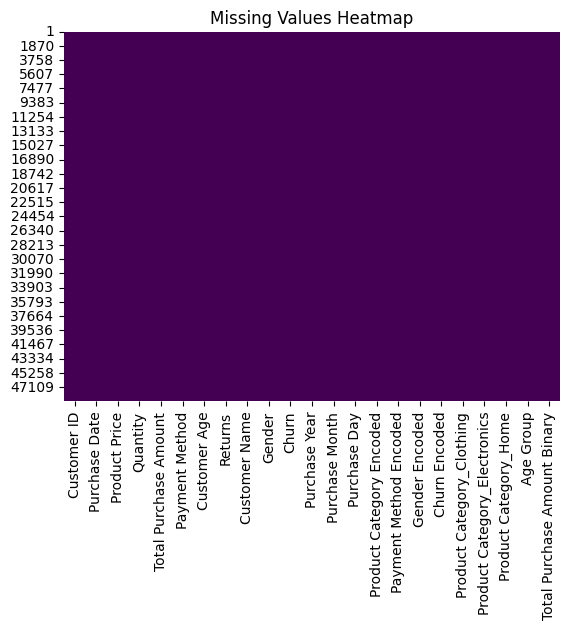

In [ ]:
print(data.isnull().sum())
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

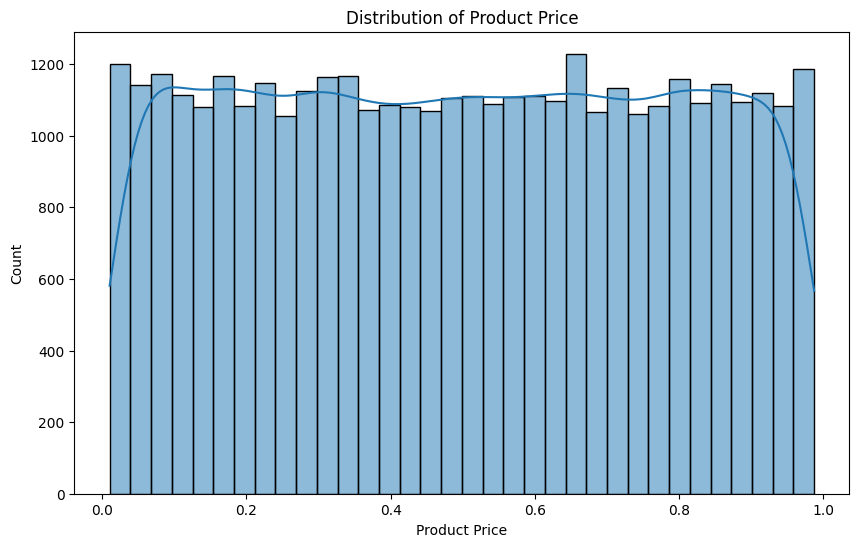

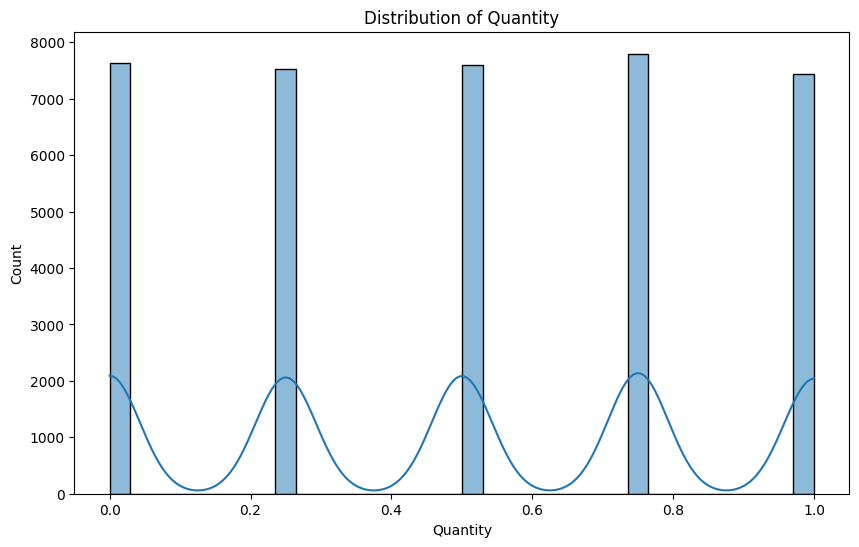

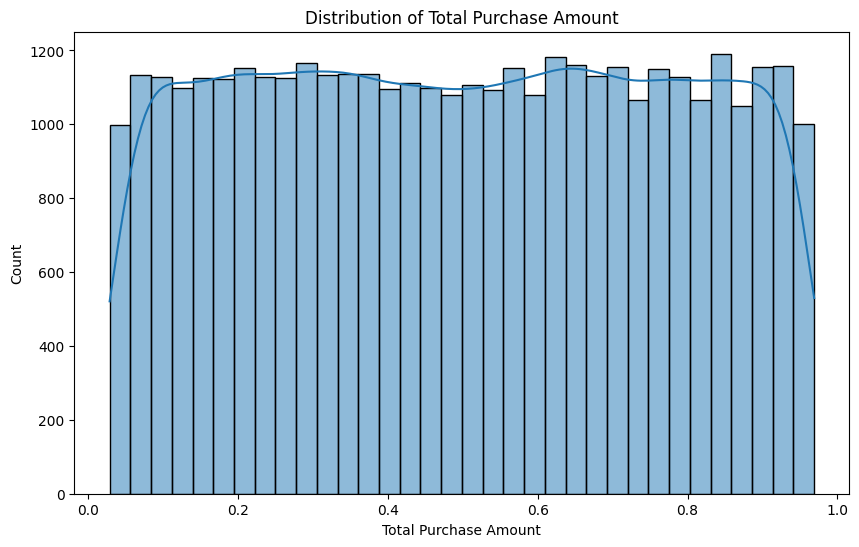

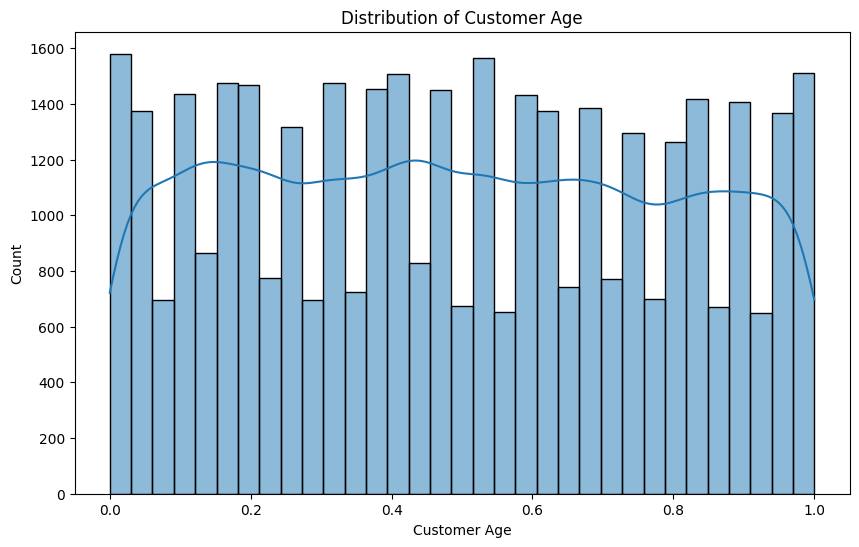

In [ ]:
numerical_features = ['Product Price', 'Quantity', 'Total Purchase Amount', 'Customer Age', ]
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 37991 entries, 1 to 48960
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Customer ID                   37991 non-null  int64         
 1   Purchase Date                 37991 non-null  datetime64[ns]
 2   Product Price                 37991 non-null  float64       
 3   Quantity                      37991 non-null  float64       
 4   Total Purchase Amount         37991 non-null  float64       
 5   Payment Method                37991 non-null  object        
 6   Customer Age                  37991 non-null  float64       
 7   Returns                       37991 non-null  float64       
 8   Customer Name                 37991 non-null  object        
 9   Gender                        37991 non-null  object        
 10  Churn                         37991 non-null  float64       
 11  Purchase Year                 379

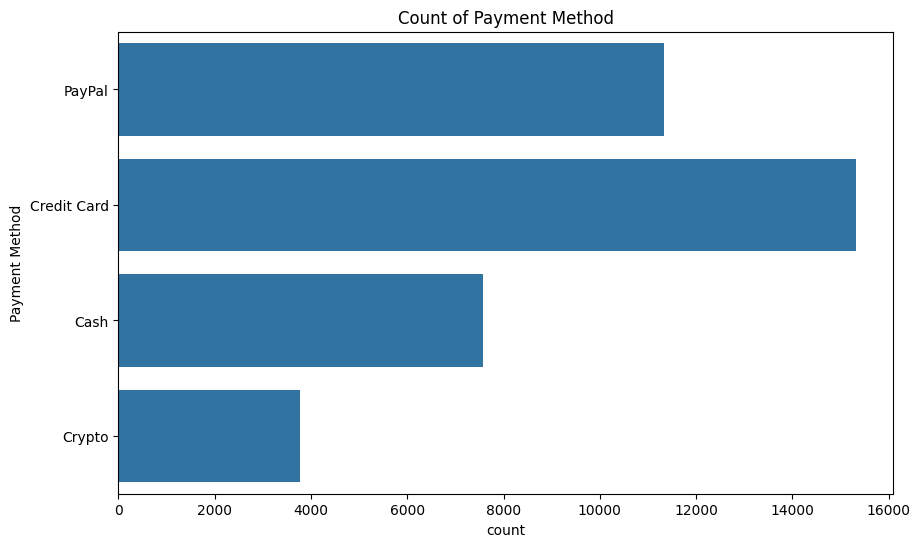

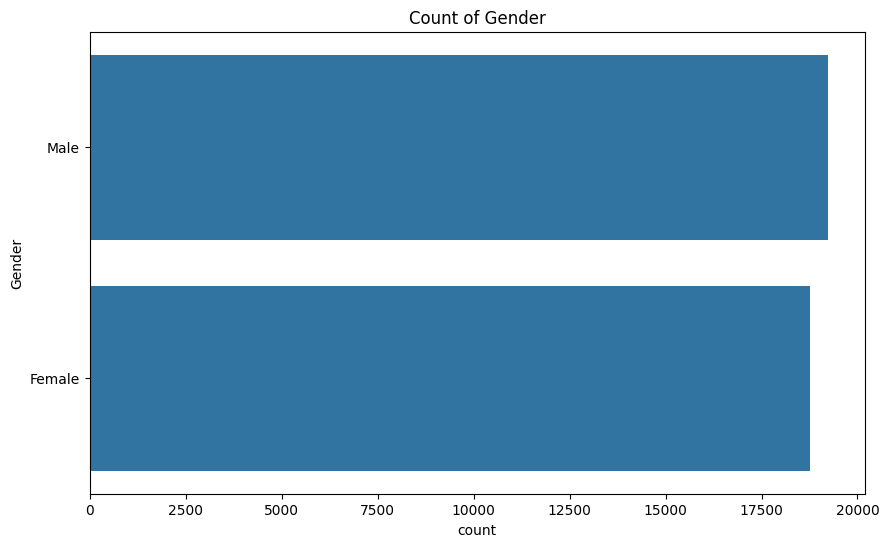

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Print information about the DataFrame
print(data.info())

categorical_features = [ 'Payment Method', 'Gender', ]
for feature in categorical_features:
    if feature in data.columns:  # Check if the column exists
        plt.figure(figsize=(10, 6))
        sns.countplot(data[feature])
        plt.title(f'Count of {feature}')
        plt.show()
    else:
        print(f"Column '{feature}' not found in the DataFrame.")

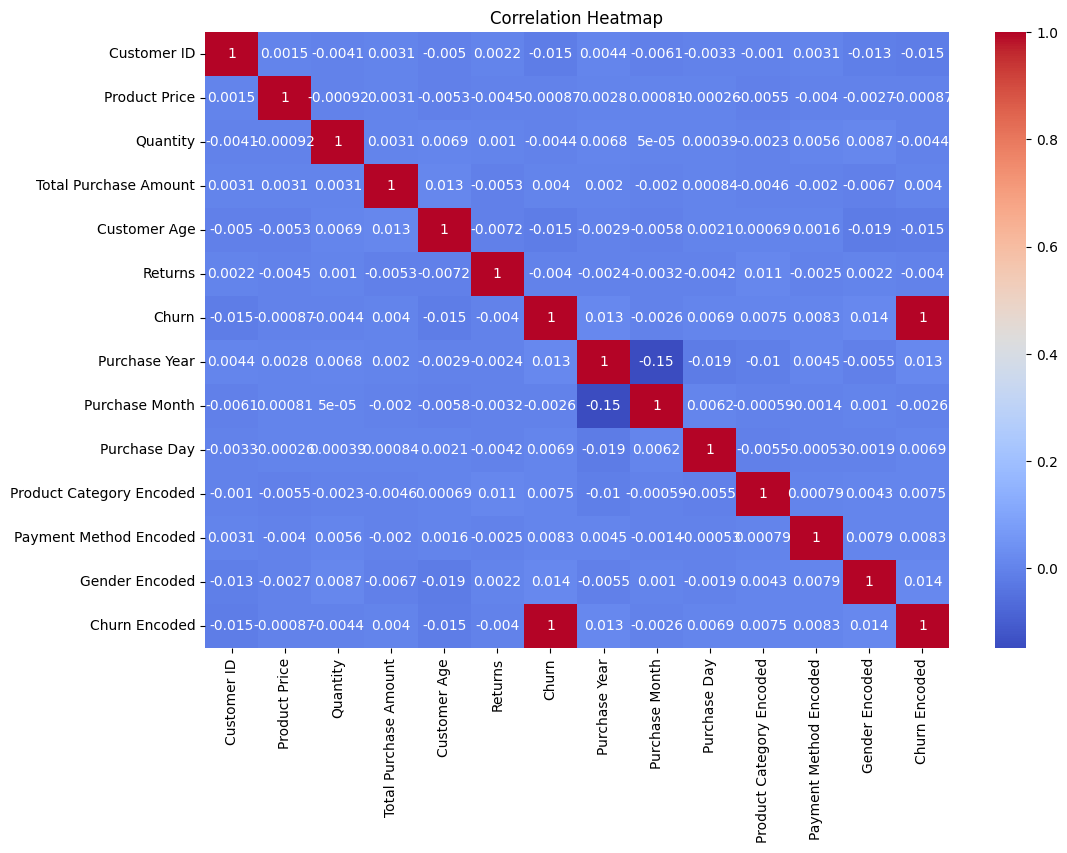

In [41]:
# Select only numerical columns before calculating correlations
numerical_data = data.select_dtypes(include=['number'])

# Calculate correlations on numerical data
corr = numerical_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [43]:
bins = [0, 18, 25, 35, 45, 55, 65, np.inf]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
data['Age Group'] = pd.cut(data['Customer Age'], bins=bins, labels=labels)


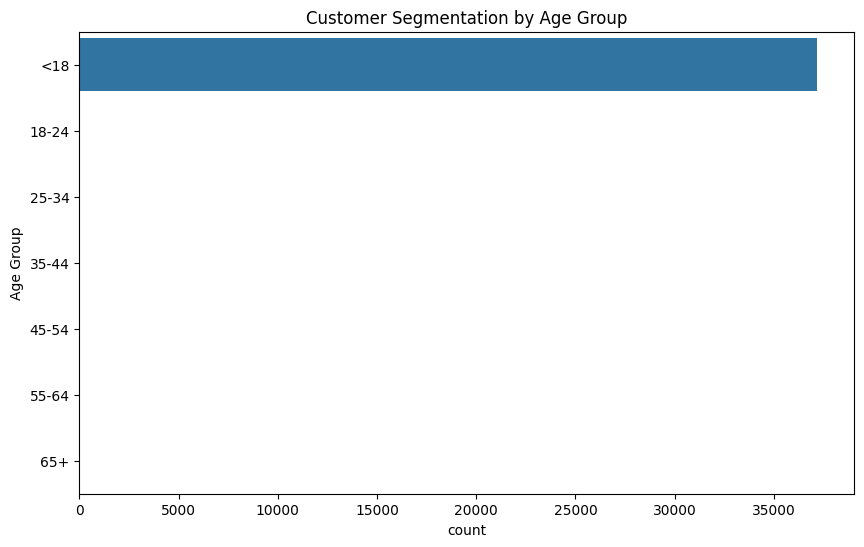

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(data['Age Group'])
plt.title('Customer Segmentation by Age Group')
plt.show()

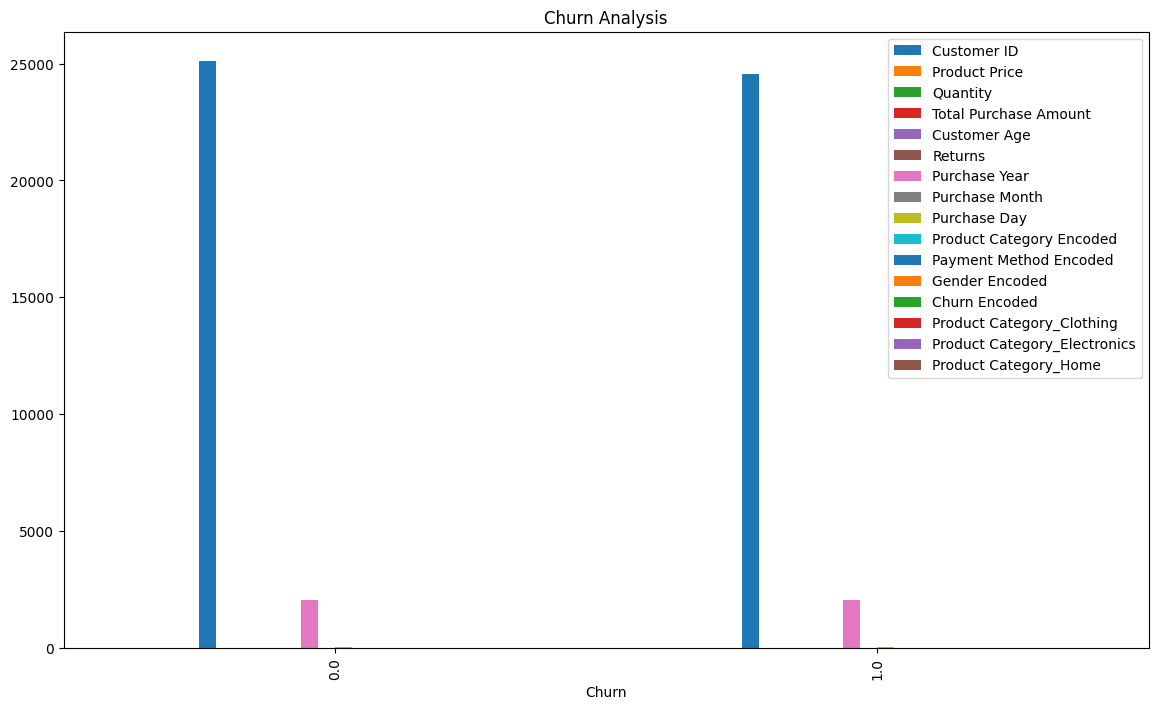

In [49]:
churn_data = data.groupby('Churn').mean(numeric_only=True) # Calculate mean for numeric columns only
churn_data.plot(kind='bar', figsize=(14, 8))
plt.title('Churn Analysis')
plt.show()

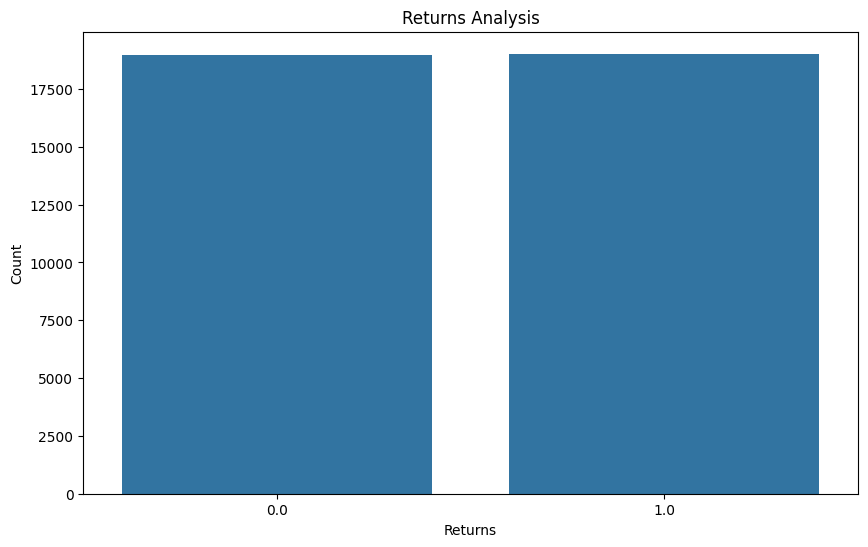

EDA completed.


In [50]:
returns_data = data['Returns'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=returns_data.index, y=returns_data.values)
plt.title('Returns Analysis')
plt.xlabel('Returns')
plt.ylabel('Count')
plt.show()

print("EDA completed.")

**3**.**RFM** **ANALYSIS**

   Customer ID        Purchase Date  Product Price  Quantity  \
0        46251  2022-03-05 12:56:35       0.934694      0.75   
1        46251  2022-05-23 18:18:01       0.567347      0.25   
2        46251  2020-11-12 13:13:29       0.379592      0.00   
3        13593  2020-11-27 17:55:11       0.895918      0.00   
4        13593  2023-03-07 14:17:42       0.489796      0.75   

   Total Purchase Amount Payment Method  Customer Age  Returns  \
0               0.502290         PayPal      0.365385      0.0   
1               0.589504         PayPal      0.365385      0.0   
2               0.649237         PayPal      0.365385      0.0   
3               0.638359    Credit Card      0.596154      0.0   
4               0.089313         PayPal      0.596154      1.0   

         Customer Name  Gender  ...  Purchase Month  Purchase Day  \
0  Christine Hernandez    Male  ...               3             5   
1  Christine Hernandez    Male  ...               5            23   
2  Christin

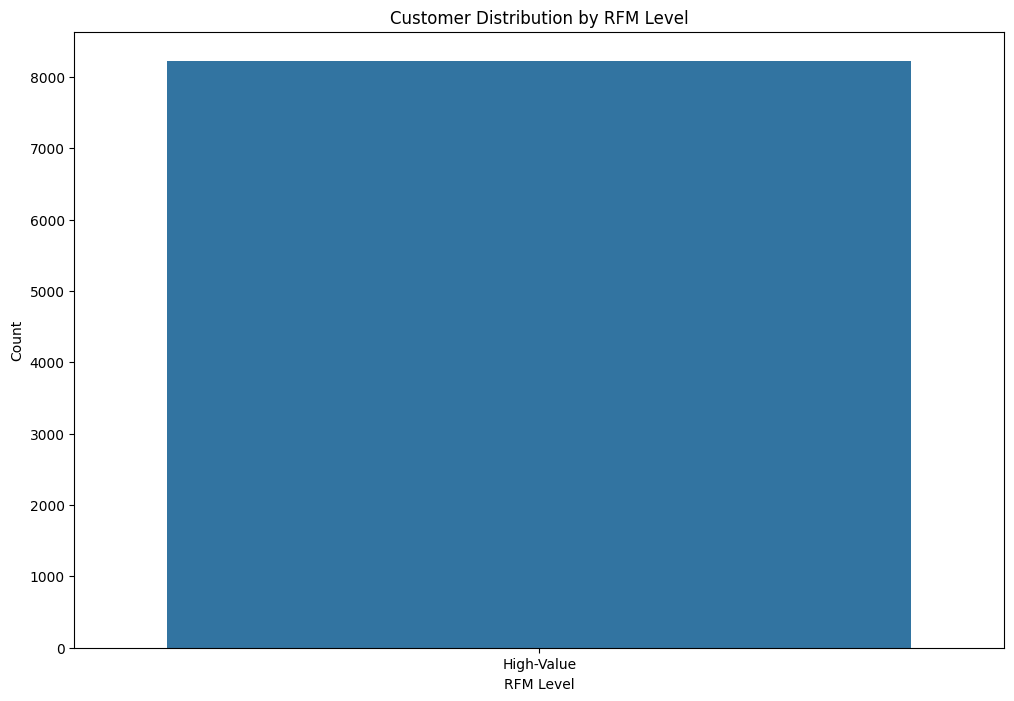

           Recency Frequency Monetary      
              mean      mean     mean count
RFM_Level                                  
High-Value   272.3       4.6      2.3  8222
RFM analysis completed and saved to 'rfm_segmentation.csv'


In [63]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/ecommerce_customer_data_custom_ratios.csv')

# Inspect the data
print(data.head())
print(data.info())
print(data.describe())

# Convert Purchase Date to datetime
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'])

# Set analysis date (latest purchase date + 1 day)
analysis_date = data['Purchase Date'].max() + dt.timedelta(days=1)

# Calculate Recency, Frequency, and Monetary value for each customer
rfm = data.groupby('Customer ID').agg({
    'Purchase Date': lambda x: (analysis_date - x.max()).days,  # Recency
    'Customer ID': 'count',  # Frequency
    'Total Purchase Amount': 'sum'  # Monetary Value
})
# Rename the columns (adjust column names as 'Customer ID' is now the index)
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# If you need 'Customer ID' as a column later, use:
rfm = rfm.reset_index()

# Rename the columns
rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

# Assign RFM scores
rfm['R'] = pd.qcut(rfm['Recency'], 4, ['1', '2', '3', '4'])
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, ['4', '3', '2', '1'])
rfm['M'] = pd.qcut(rfm['Monetary'], 4, ['4', '3', '2', '1'])

# Concatenate RFM scores to create RFM segment
rfm['RFM_Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

# Calculate RFM score
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis=1).astype(int)

# Define RFM segment map
rfm['RFM_Level'] = 'Low-Value'
rfm.loc[rfm['RFM_Score'] > 7, 'RFM_Level'] = 'Mid-Value'
rfm.loc[rfm['RFM_Score'] > 9, 'RFM_Level'] = 'High-Value'

# Visualize RFM segments
plt.figure(figsize=(12, 8))
sns.countplot(x='RFM_Level', data=rfm)
plt.title('Customer Distribution by RFM Level')
plt.xlabel('RFM Level')
plt.ylabel('Count')
plt.show()

# Additional analysis: RFM Segments
rfm_summary = rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)

print(rfm_summary)

# Save the RFM segmentation result
rfm.to_csv('rfm_segmentation.csv', index=False)
print("RFM analysis completed and saved to 'rfm_segmentation.csv'")


In [66]:
pip install matplotlib

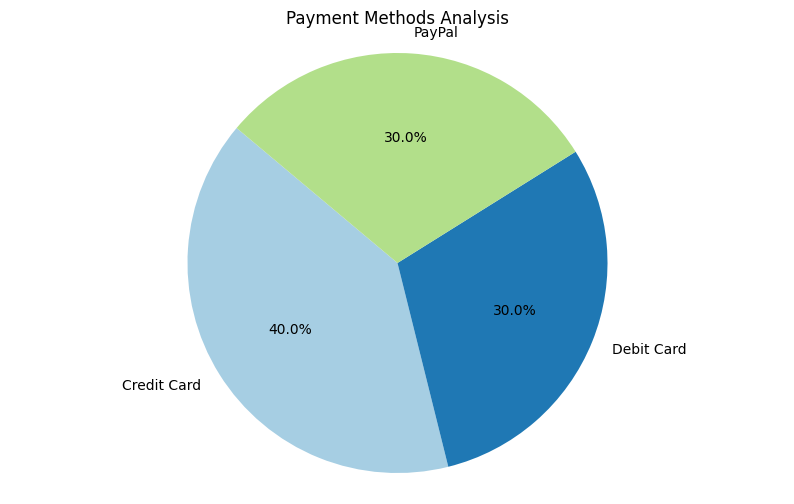

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample dataset
data = pd.DataFrame({
    'Customer ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Payment Method': ['Credit Card', 'Debit Card', 'Credit Card', 'PayPal', 'Debit Card',
                       'Credit Card', 'Credit Card', 'PayPal', 'PayPal', 'Debit Card']
})

# Count the occurrences of each payment method
payment_method_counts = data['Payment Method'].value_counts()

# Create a pie chart visualization for Payment Methods
plt.figure(figsize=(10, 6))
plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(payment_method_counts))))
plt.title('Payment Methods Analysis')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

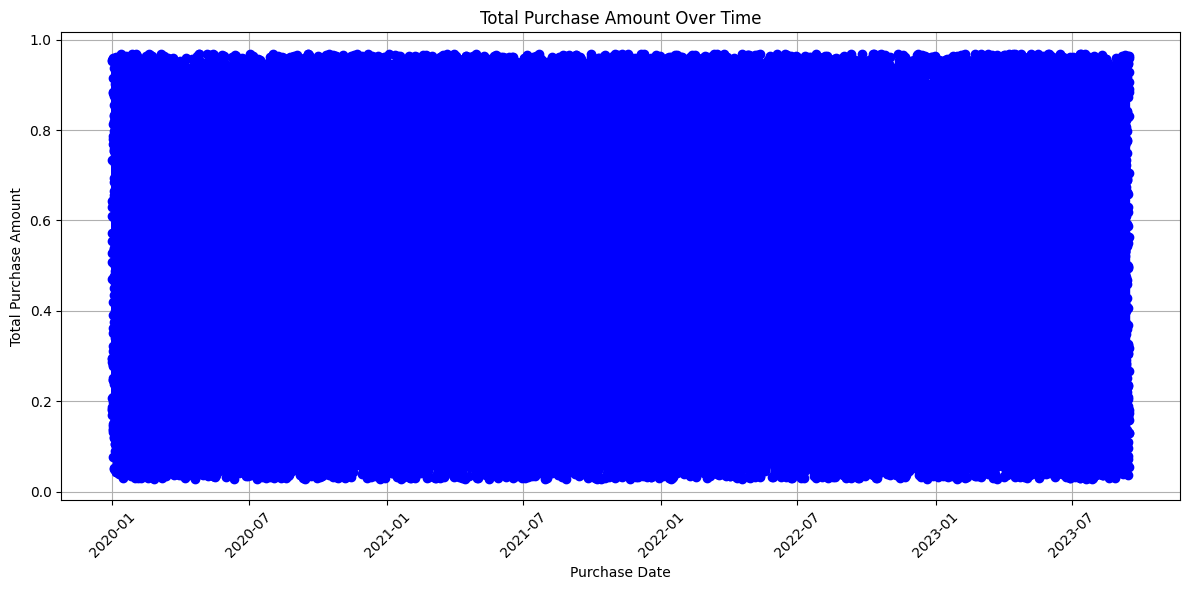

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'customer_data.csv' is the file containing the dataset
data = pd.read_csv('/content/ecommerce_customer_data_custom_ratios.csv')

# Convert 'Purchase Date' to datetime format
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'])

# Sort data by 'Purchase Date'
data = data.sort_values('Purchase Date')

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(data['Purchase Date'], data['Total Purchase Amount'], marker='o', linestyle='-', color='b')
plt.title('Total Purchase Amount Over Time')
plt.xlabel('Purchase Date')
plt.ylabel('Total Purchase Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


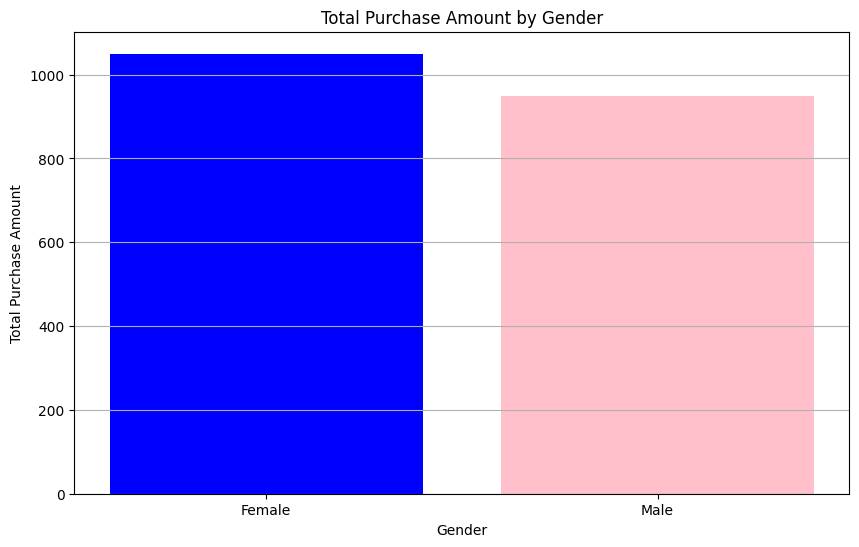

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data creation since the original dataset isn't available
data = pd.DataFrame({
    'Customer ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female'],
    'Total Purchase Amount': [100, 200, 150, 300, 250, 100, 200, 150, 300, 250]
})

# Aggregate total purchase amount by gender
gender_purchase_amount = data.groupby('Gender')['Total Purchase Amount'].sum().reset_index()

# Plot the stacked column chart
plt.figure(figsize=(10, 6))
plt.bar(gender_purchase_amount['Gender'], gender_purchase_amount['Total Purchase Amount'], color=['blue', 'pink'])
plt.title('Total Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Purchase Amount')
plt.grid(True, axis='y')

# Show the plot
plt.show()


**4**.**CUSTOMER** **SEGMENTATION**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


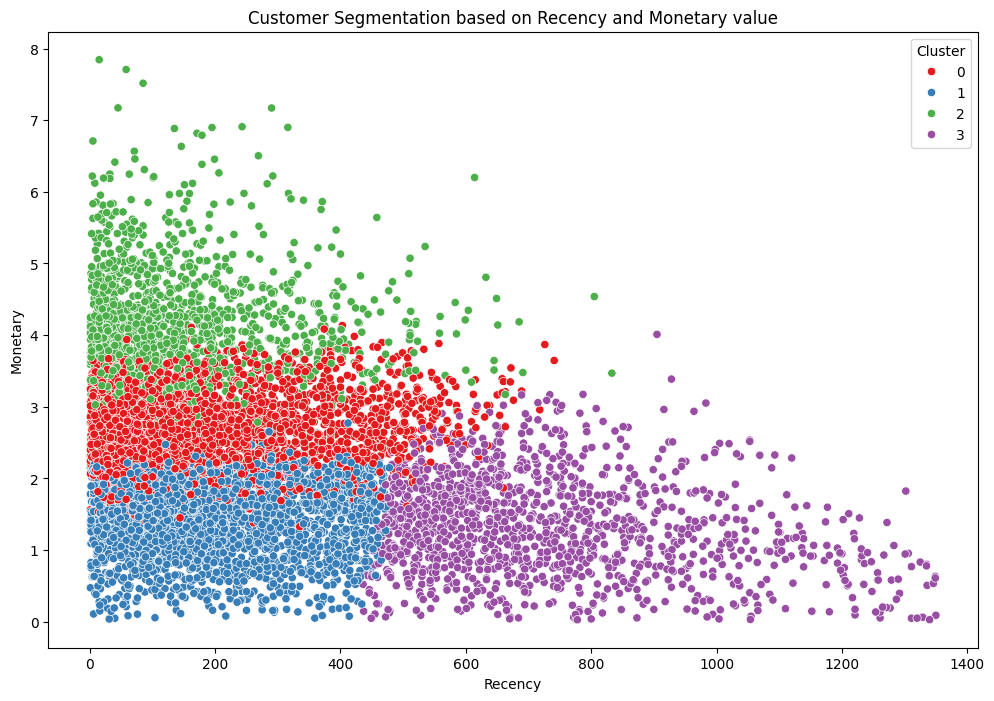

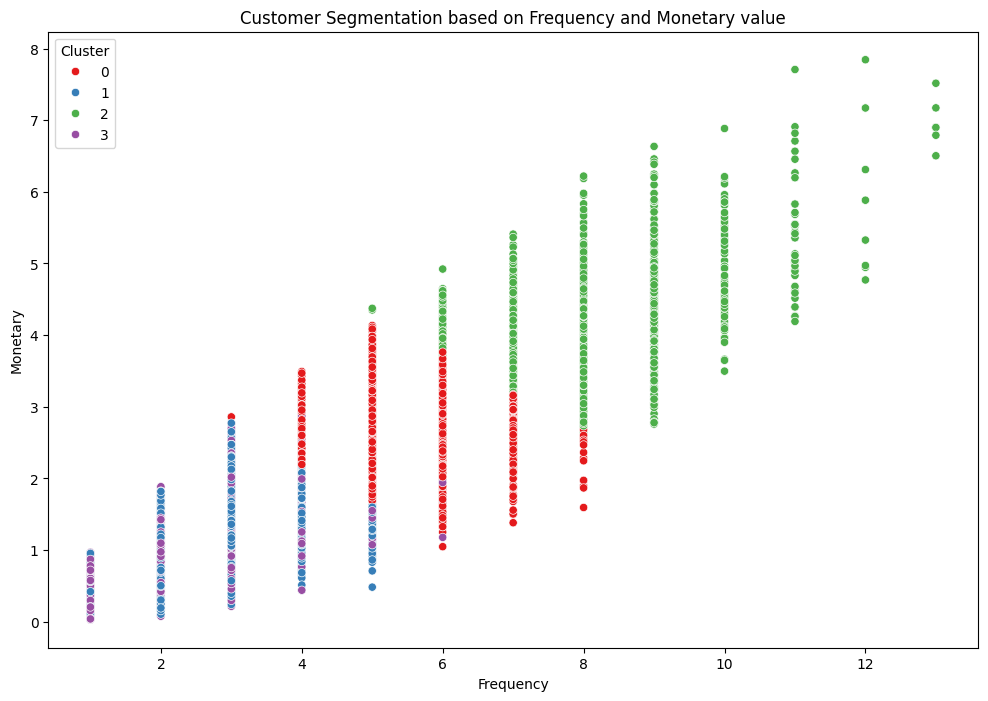

Customer segmentation completed and saved to 'segmented_customers.csv'


In [65]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the data
data = pd.read_csv('/content/ecommerce_customer_data_custom_ratios.csv')

# Convert Purchase Date to datetime
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'])

# Set analysis date (latest purchase date + 1 day)
analysis_date = data['Purchase Date'].max() + dt.timedelta(days=1)

# Calculate Recency, Frequency, and Monetary value for each customer
rfm = data.groupby('Customer ID').agg({
    'Purchase Date': lambda x: (analysis_date - x.max()).days,  # Recency
    'Customer ID': 'count',  # Frequency
    'Total Purchase Amount': 'sum'  # Monetary Value
})

# Rename the columns (adjust column names as 'Customer ID' is now the index)
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Reset the index and keep 'Customer ID' as a column
rfm = rfm.reset_index()  # No need to specify column names here

# Standardize the RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Analyze and visualize the clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['Recency', 'Frequency', 'Monetary'])

# Add cluster information to the original data
data = data.merge(rfm[['Customer ID', 'Cluster']], on='Customer ID')

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm, palette='Set1')
plt.title('Customer Segmentation based on Recency and Monetary value')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Frequency', y='Monetary', hue='Cluster', data=rfm, palette='Set1')
plt.title('Customer Segmentation based on Frequency and Monetary value')
plt.show()

# Save the segmented data
data.to_csv('segmented_customers.csv', index=False)
print("Customer segmentation completed and saved to 'segmented_customers.csv'")